# Telco Customer Churn Analysis

Welcome to this Jupyter Notebook on Telco Customer Churn Analysis. In the competitive telecommunications industry, customer retention is crucial for sustained growth. This analysis aims to identify customers at risk of churning (leaving the company), understand the key factors driving churn, and provide actionable insights to reduce churn rates. In this notebook I'm working with the Kaggle dataset: "https://www.kaggle.com/datasets/blastchar/telco-customer-churn"

### Business Context
Churn leads to lost revenue and increased acquisition costs. By predicting churn, the company can proactively engage at-risk customers with targeted offers, such as discounts or service upgrades.

### Objectives
- Explore and clean the dataset.
- Build a predictive model to identify potential churners.
- Use SHAP for model explainability.
- Optimize decision thresholds based on business costs.
- Create a churn watchlist and segment customers by risk level.

### Dataset Overview
The dataset contains 7043 customer records with 21 features, including demographics, services, and account details. The target variable is 'Churn' (Yes/No).

## 1. Data Loading and Initial Exploration
I begin by loading the dataset from a CSV file. Then, I use `info()` to check data types and non-null counts, and `describe()` to get summary statistics for numerical columns. This helps to understand the data's structure and identify potential issues like missing values or outliers.

In [104]:
import pandas as pd

# Load the dataset
churn_df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information
churn_df.info()
churn_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Interpretation
The dataset has 7043 entries with no missing values initially. Numerical features like 'tenure' range from 0 to 72 months, and 'MonthlyCharges' from 18.25 $ - 118.75 $. 'SeniorCitizen' is binary (0 or 1).

Now, let's preview the first few rows to see the data in action.

In [107]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Quality Check
Checking for missing values in each column and look for any duplicate rows.

In [110]:
# Count missing values per column
print(churn_df.isnull().sum())

# Check for duplicate entries
print(f"Number of duplicate rows: {churn_df.duplicated().sum()}")


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Number of duplicate rows: 0


### Interpretation
No missing values or duplicates—great!


## 3. Exploring Categorical Data
Print unique values for each categorical column to detect inconsistencies or unexpected categories.

In [113]:
# Check unique values for potential data inconsistencies
for col in churn_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {churn_df[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


### Interpretation
Categories look consistent, but 'No internet service' appears in several columns, which will be standardized to 'No' for simplicity in modeling.

## 4. Data Cleaning
The 'TotalCharges' column is object type but should be numeric. Convert it, handling empty strings as NaN, and fill them with 0 (assuming new customers).

In [116]:
# Convert 'TotalCharges' to numeric, coercing errors (empty strings will become NaN)
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Check missing values after conversion
print(f"Missing 'TotalCharges' after conversion: {churn_df['TotalCharges'].isnull().sum()}")


Missing 'TotalCharges' after conversion: 11


In [118]:
# Fill missing 'TotalCharges' with 0
churn_df['TotalCharges'] = churn_df['TotalCharges'].fillna(0)


In [119]:
print(churn_df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Standardize service columns by replacing 'No internet service' with 'No' to simplify binary categories.

In [122]:
# Replace 'No internet service' with 'No' in the specified columns
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_replace:
    churn_df[col] = churn_df[col].replace('No internet service', 'No')

# Display unique values to verify replacement
for col in cols_to_replace:
    print(f"{col}: {churn_df[col].unique()}")


OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']


In [125]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📊 Exploratory Data Analysis (EDA)

Before building models, I start by exploring and understanding the dataset.  
The goal of EDA is to:

- Understand the **distribution of features** and how they relate to the target variable (`Churn`).
- Inspect the distribution of numerical features.
- Inspect the distributions of categorical features.

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

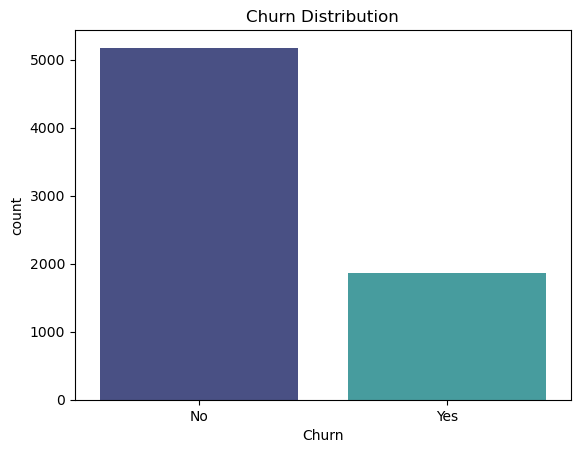

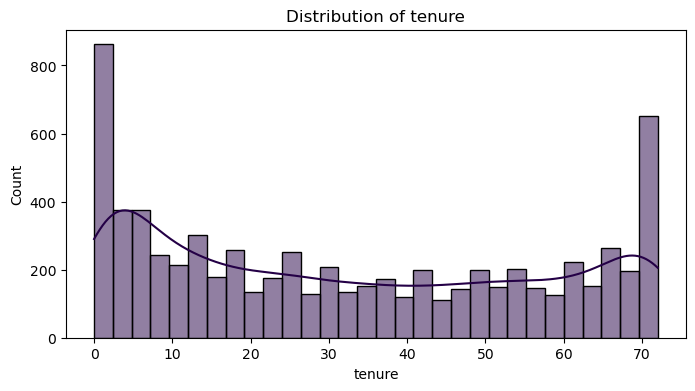

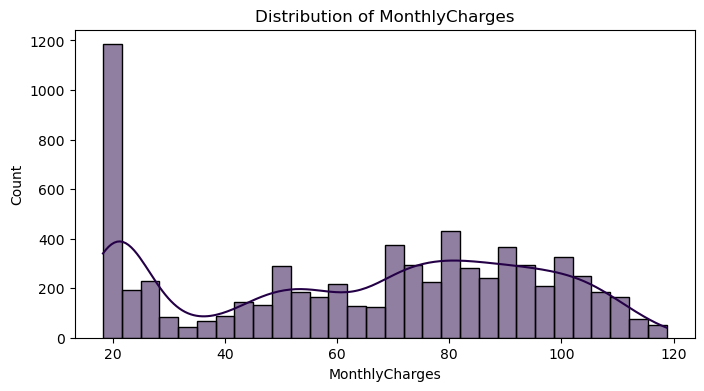

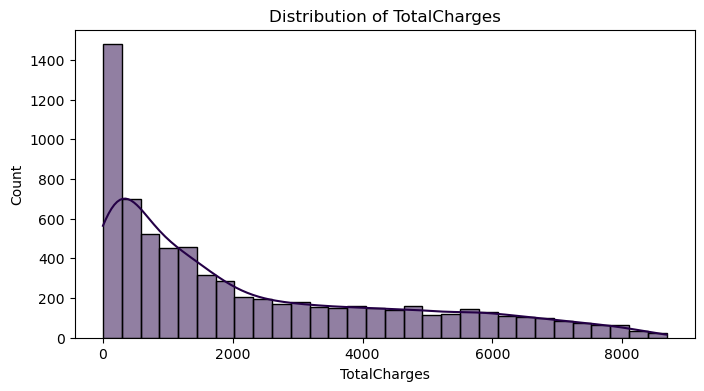

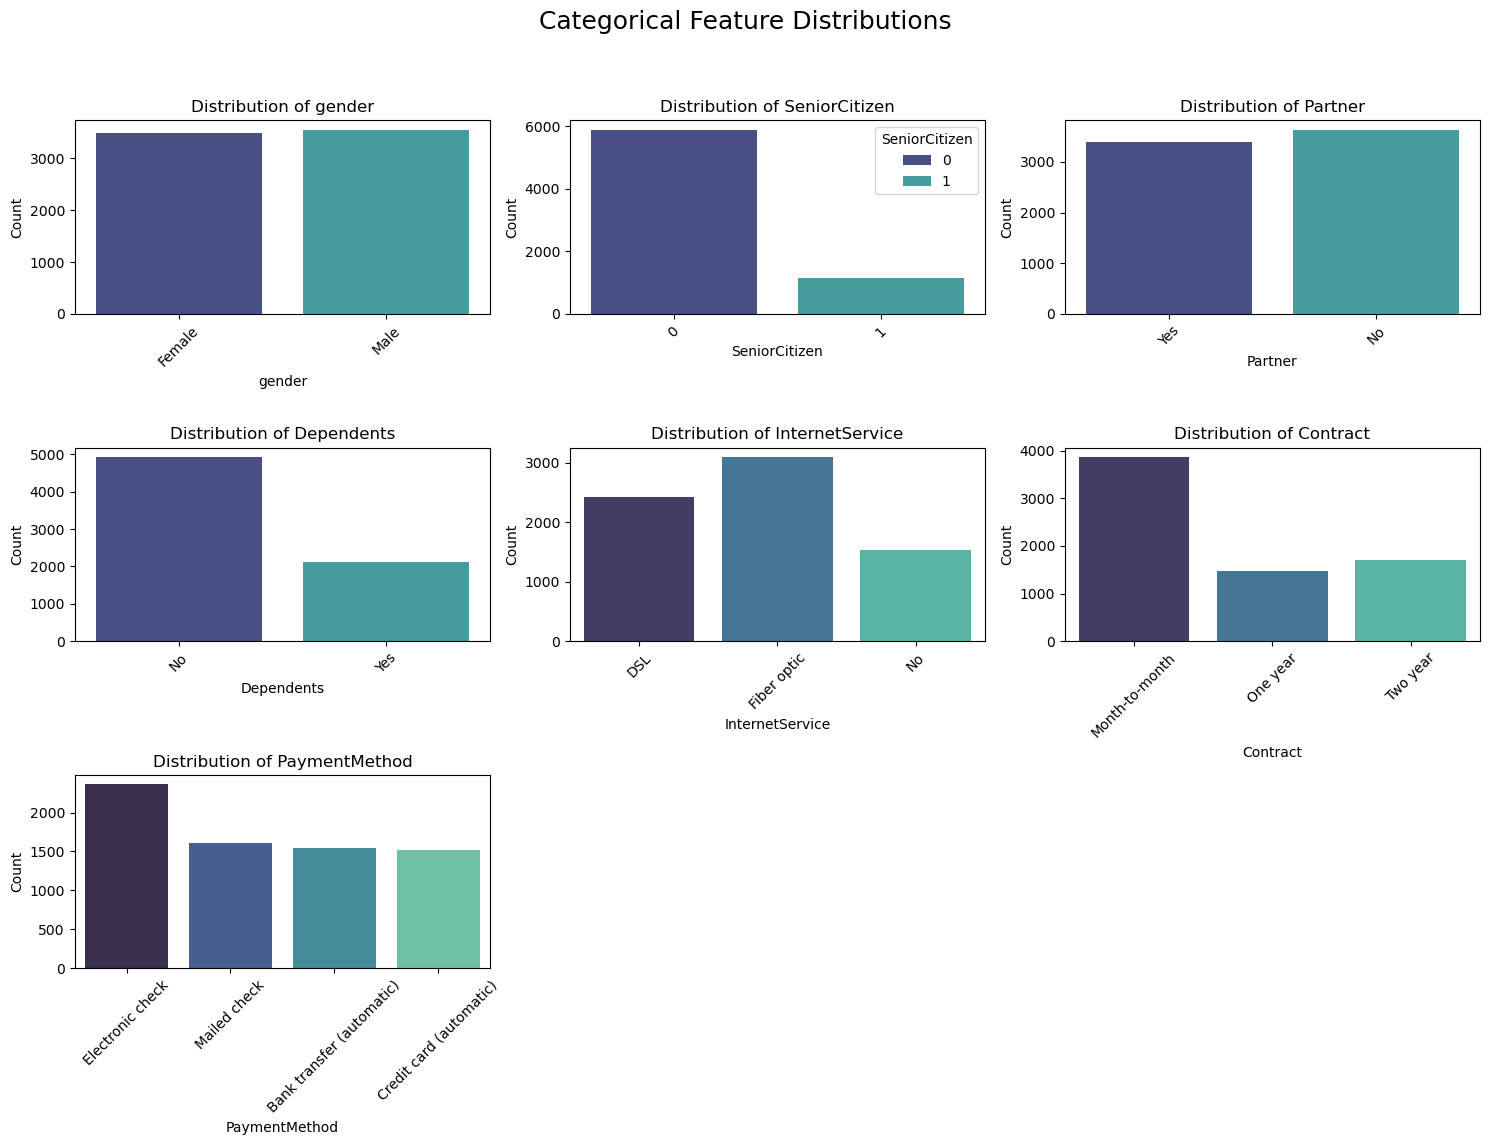

In [131]:
# Distribution of churners vs non-churners
sns.countplot(x='Churn', hue='Churn', data=churn_df, palette='mako', legend=False)
plt.title('Churn Distribution')
plt.show()


# Distribution of tenure, MonthlyCharges, and TotalCharges
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(churn_df[col], kde=True, bins=30, color="#240046")
    plt.title(f'Distribution of {col}')
    plt.show()

# Distributions by categorical features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']
while len(categorical_cols) < 9:
    categorical_cols.append(None)

# Create a figure with 3 rows and 3 columns of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Categorical Feature Distributions', fontsize=18)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and axes, plotting each
for ax, col in zip(axes, categorical_cols):
    if col is not None:
        sns.countplot(x=col, hue= col, data=churn_df, ax=ax, palette='mako')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    else:
        # Hide unused subplot
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

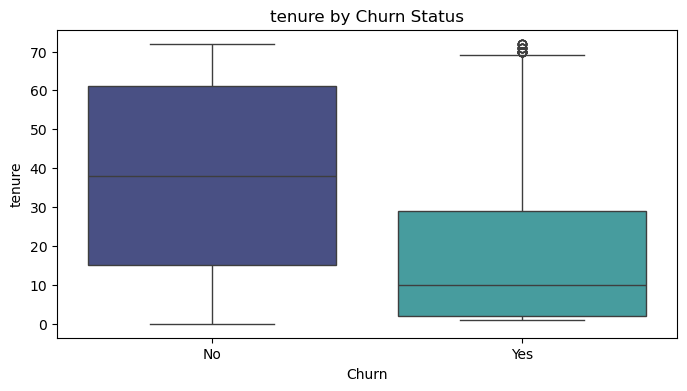

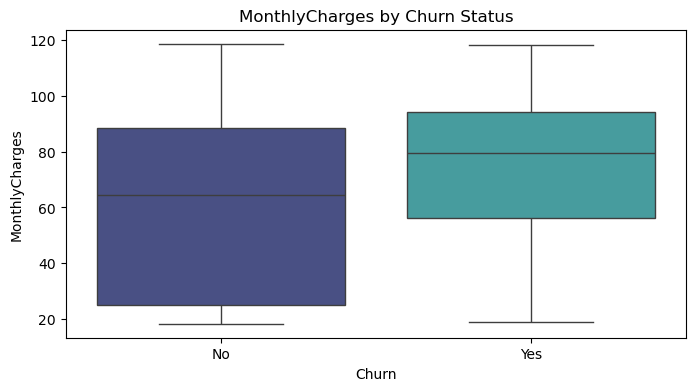

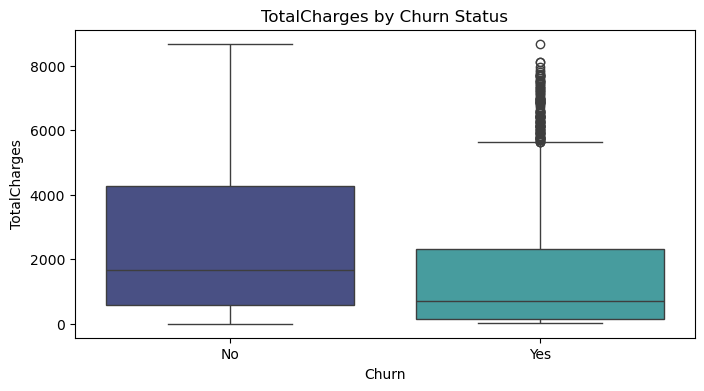

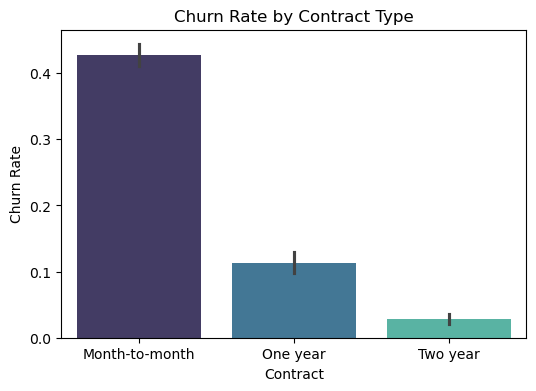

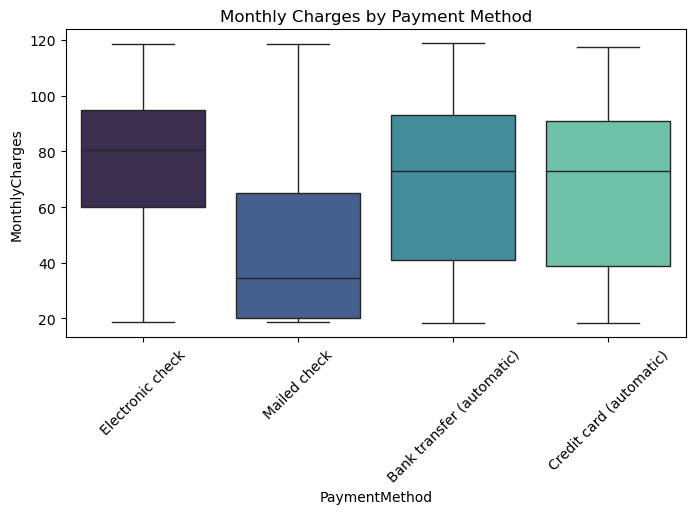

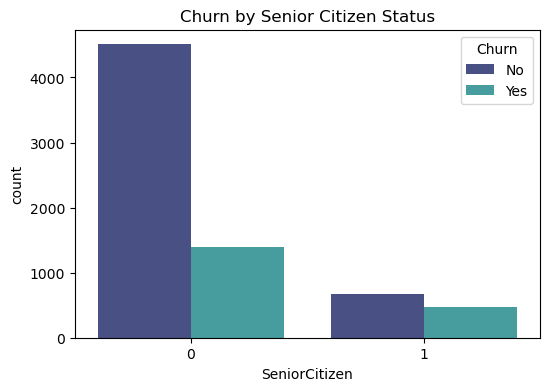

In [133]:
# Boxplots to compare distributions by churn
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, hue= 'Churn', data=churn_df, palette ='mako')
    plt.title(f'{col} by Churn Status')
    plt.show()

# Churn rate by contract type
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', hue = 'Contract',  y=churn_df['Churn'].eq('Yes'), data=churn_df,  palette ='mako')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

# Monthly charges distribution by payment method
plt.figure(figsize=(8,4))
sns.boxplot(x='PaymentMethod', hue = 'PaymentMethod', y='MonthlyCharges', data=churn_df,  palette ='mako')
plt.xticks(rotation=45)
plt.title('Monthly Charges by Payment Method')
plt.show()

# Churn distribution across SeniorCitizens and Gender
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn_df,  palette ='mako')
plt.title('Churn by Senior Citizen Status')
plt.show()


## 🛠️ Feature Engineering

Feature engineering transforms raw data into features that better represent the underlying problem to the predictive models.

Goals in feature engineering are:
- Improve model predictive power by creating informative features.
- Make data more **machine learning‑friendly** (convert categorical to numeric, handle missing values).
- Capture important **business domain insights**.

### 1. Binning Tenure into Groups
Transform the continuous `tenure` feature into discrete intervals.
This helps the model detect patterns in churn likelihood for customers at different stages of their relationship with the company (new vs. long-term customers).

### 2. Mapping Binary Flags
The `SeniorCitizen` column is numerical (0 or 1) but actually represents Yes/No. We map it to a categorical form for interpretability (or to binary integers for modeling).

### 3. Aggregating Service Counts
Create `TotalServices` by counting how many services a customer subscribes to.  
Hypothesis: customers with more services are more “locked-in” and less likely to churn.

### 4. Interaction Features
Create `MonthlyCharges_ContractAdj` by adjusting the monthly charges based on contract type.  
This captures the combined effect of spending level and contract length on churn.

### 5. Average Charges
Introduce `AvgCharges` = `TotalCharges` / `tenure` to measure a customer’s average monthly spend.  
This normalizes spending across customers with different contract lengths.

### 6. Encoding Categorical Variables
- **Binary Yes/No fields**: Converted to 1/0 for modeling.
- **Multi‑class categorical features**: One‑hot encoding generates dummy variables for algorithms that require numerical input.

### 7. Missing Value Handling
Impute missing numerical values (like in `TotalCharges`) to avoid model errors, ensuring no NaNs remain before training.

---

By performing these feature engineering steps:
- **Better data quality** → fewer errors during model training.
- **More predictive features** → model has more useful signals to learn from.
- **Alignment with business understanding** → engineered features reflect known drivers of churn.


In [14]:
# 1. Binning tenure into groups
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-12 Months', '12-24 Months', '24-48 Months', '48-60 Months', '60-72 Months']
churn_df['tenure_group'] = pd.cut(churn_df['tenure'], bins=bins, labels=labels, right=False)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [15]:
# 2. Convert SeniorCitizen from 0/1 to No/Yes
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [16]:
# 3. Create TotalServices feature: count how many services customer subscribes to (Yes counts)
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [17]:
# For InternetService, replace with binary flag for service/no service, since it has multiple categories
churn_df['InternetService_flag'] = churn_df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,InternetService_flag
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months,1
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months,1
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months,1
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months,1


In [18]:
# Count 'Yes' in service columns (except InternetService replaced by binary)
def count_services(row):
    count = 0
    for col in service_cols:
        if col == 'InternetService':
            count += row['InternetService_flag']
        else:
            count += 1 if row[col]=='Yes' else 0
    return count

churn_df['TotalServices'] = churn_df.apply(count_services, axis=1)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,InternetService_flag,TotalServices
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months,1,2
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months,1,4
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months,1,4
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months,1,4
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months,1,2


In [19]:
# 4. Interaction Feature: MonthlyCharges adjusted by Contract type
# Create feature that multiplies MonthlyCharges by a factor depending on contract (to capture upfront vs long term effect)
contract_map = {'Month-to-month': 1.2, 'One year': 1.0, 'Two year': 0.8}
churn_df['MonthlyCharges_ContractAdj'] = churn_df['MonthlyCharges'] * churn_df['Contract'].map(contract_map)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,InternetService_flag,TotalServices,MonthlyCharges_ContractAdj
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months,1,2,35.82
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,24-48 Months,1,4,56.95
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months,1,4,64.62
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months,1,4,42.30
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months,1,2,84.84


In [20]:
# 5. Feature: AverageCharges - TotalCharges divided by tenure (avoid division by zero)
churn_df['AvgCharges'] = churn_df['TotalCharges'] / churn_df['tenure'].replace(0, 1)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,InternetService_flag,TotalServices,MonthlyCharges_ContractAdj,AvgCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0-12 Months,1,2,35.82,29.850000
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,24-48 Months,1,4,56.95,55.573529
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-12 Months,1,4,64.62,54.075000
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months,1,4,42.30,40.905556
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0-12 Months,1,2,84.84,75.825000


In [21]:
# 6. Encoding categorical variables
# For binary 'Yes'/'No' fields encode as 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    churn_df[col] = churn_df[col].map({'Yes': 1, 'No': 0}) 

# One-hot encoding for multi-class categorical variables
multi_cat_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group', 'SeniorCitizen']
churn_df = pd.get_dummies(churn_df, columns=multi_cat_cols, drop_first=True)

# Drop helper column
churn_df.drop('InternetService_flag', axis=1, inplace=True)

In [22]:
churn_df.head()

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_12-24 Months,tenure_group_24-48 Months,tenure_group_48-60 Months,tenure_group_60-72 Months,SeniorCitizen_Yes
0,7590-VHVEG,1,0,1,0,NaN,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
1,5575-GNVDE,0,0,34,1,0.0,1,0,1,0,...,True,False,False,False,True,False,True,False,False,False
2,3668-QPYBK,0,0,2,1,0.0,1,1,0,0,...,False,False,False,False,True,False,False,False,False,False
3,7795-CFOCW,0,0,45,0,NaN,1,0,1,1,...,True,False,False,False,False,False,True,False,False,False
4,9237-HQITU,0,0,2,1,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


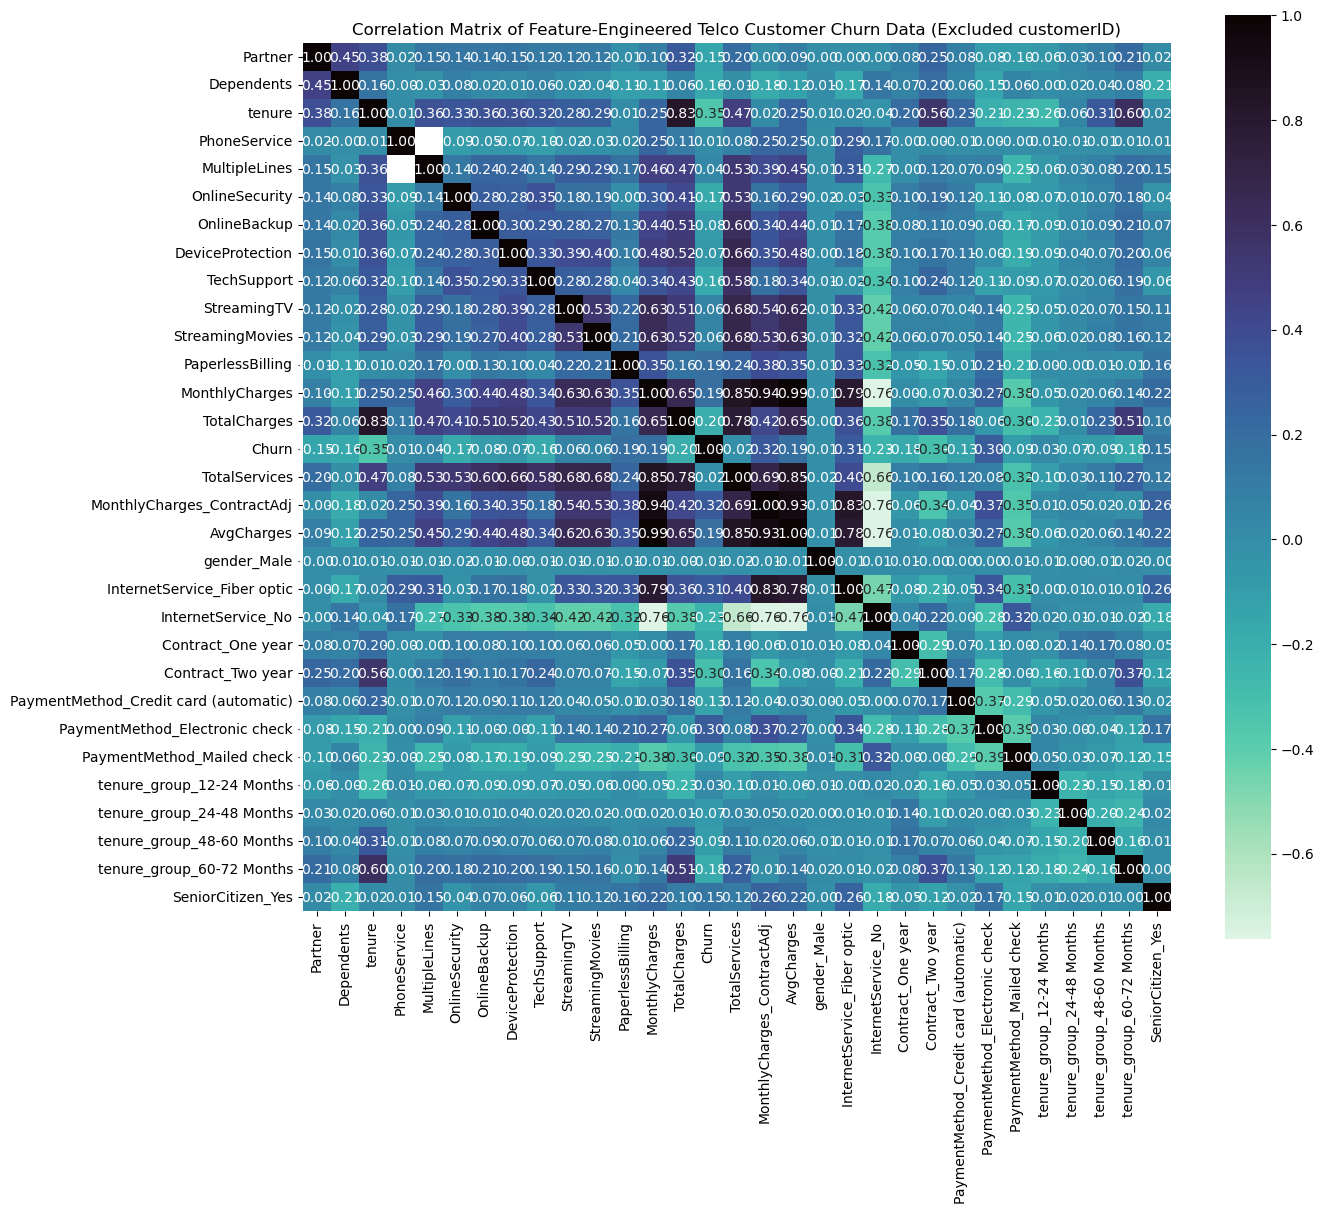

Correlations with Churn:
 Churn                                    1.000000
MonthlyCharges_ContractAdj               0.316954
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
AvgCharges                               0.193301
PaperlessBilling                         0.191825
SeniorCitizen_Yes                        0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040207
tenure_group_12-24 Months                0.028164
PhoneService                             0.011942
gender_Male                             -0.008612
TotalServices                           -0.019375
DeviceProtection                        -0.066160
tenure_group_24-48 Months               -0.070208
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
tenure_group_48-60 Month

In [23]:
# Drop 'customerID' column before calculating correlation matrix
corr_matrix = churn_df.drop(columns=['customerID'], errors='ignore').corr()

# Plot the heatmap of correlations
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako_r', cbar=True, square=True)
plt.title('Correlation Matrix of Feature-Engineered Telco Customer Churn Data (Excluded customerID)')
plt.show()

# Display correlations with the target 'Churn' sorted by absolute value descending
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlations with Churn:\n", corr_with_churn)


## 🤖 Modeling

After data preparation and feature engineering, we move into the **modeling stage**.  
Here the goal is to **train predictive models** that can accurately classify whether a customer is likely to churn.

### 1. Train/Test Split
Split the dataset into **training** (80%) and **testing** (20%) sets to:
- Train models on one portion of the data.
- Evaluate performance on unseen data to estimate real-world accuracy.

WUse `stratify=y` to preserve the **class distribution of churn/non-churn** in both sets.

### 2. Handling Missing Values in the Pipeline
Models like Logistic Regression cannot directly handle missing values, so integrate a `SimpleImputer` in the workflow to fill gaps automatically.

### 3. Model Types Used
Experiment with three different classification algorithms:
- **Logistic Regression** 📈 – interpretable baseline linear model.
- **Random Forest Classifier** 🌲 – ensemble of decision trees, robust and non-linear.
- **Gradient Boosting Classifier** 🚀 – sequential ensemble method that often achieves high accuracy for structured/tabular data.

### 4. Preprocessing in Pipelines
Pipelines combine:
- **Imputation** (handling missing values)
- **Scaling** (for models that benefit from normalized features, like logistic regression)
- **Classifier** (algorithm of choice)

This ensures that **all preprocessing steps are applied consistently** during both training and testing.

### 5. Model Training
Each model is fit on the training set while keeping hyperparameters at reasonable defaults or tuned later via **Grid Search** or **Randomized Search** for maximum predictive performance.

---

## 📈 Model Evaluation

Once models are trained, evaluate them on the **test (unseen) dataset** to measure performance and generalization ability.

### 1. Metrics Used
Report multiple performance metrics to get a complete picture:

- **Accuracy**: Overall percentage of correct predictions.
- **Precision**: Of the customers predicted as "churners", how many actually churned?  
  (High precision = fewer false alarms)
- **Recall (Sensitivity)**: Of all actual churners, how many did we correctly identify?  
  (High recall = fewer missed churners)
- **F1 Score**: Harmonic mean of precision and recall; useful when both metrics are important.
- **ROC AUC**: Measures the model’s ability to rank churners above non-churners regardless of threshold.

### 2. Importance of Multiple Metrics
Accuracy alone can be misleading if the dataset is imbalanced (e.g., many more non-churners than churners).  
That’s why we emphasize Recall, Precision, and AUC to capture real-world performance, especially in churn prevention where:
- **False Negatives** = missed churners (potentially lost revenue)
- **False Positives** = unnecessary retention campaign costs

### 3. Model Comparison
Compare metrics across:
- **Logistic Regression** (baseline)
- **Random Forest** (ensemble)
- **Gradient Boosting** (advanced ensemble)

### 4. Extended Evaluation
For the best-performing model:
- Perform **hyperparameter tuning** (using RandomizedSearchCV or GridSearchCV).
- Adjust the **classification threshold** to balance recall vs. precision in line with business costs.
- Evaluate post-threshold-adjustment performance to ensure alignment with operational goals.

### 5. Visualization
Use:
- **Confusion matrices** to see prediction breakdowns.
- **ROC curves** to visualize ranking ability.
- **Precision–Recall curves** to explore trade-offs when changing the decision threshold.

---


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare features and target
X = churn_df.drop(columns=['Churn', 'customerID'], errors='ignore')
y = churn_df['Churn']

# Split into train/test sets (80% train, 20% test), stratify preserves class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# For Logistic Regression and Gradient Boosting, scaling helps; Random Forest doesn't require scaling but imputation still needed
pipelines = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', models['Logistic Regression'])
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', models['Random Forest'])
    ]),
    'Gradient Boosting': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', models['Gradient Boosting'])
    ]),
}

# Train, predict, and evaluate models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # probability estimates for ROC AUC
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Performance:
Accuracy: 0.8006
Precision: 0.6566
Recall: 0.5214
F1 score: 0.5812
ROC AUC: 0.8433
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Random Forest Performance:
Accuracy: 0.7885
Precision: 0.6284
Recall: 0.4973
F1 score: 0.5552
ROC AUC: 0.8242
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Gradient Boosting Performance:
Accuracy: 0.7970
Precision: 0.6477
Recal

## 📊 Baseline Model Comparison

Evaluated three classification models — **Logistic Regression**, **Random Forest**, and **Gradient Boosting** — on the same training/test split to establish baseline performance and compare their strengths.

### 🔹 Summary of Key Metrics

| Model                | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|----------------------|----------|-----------|---------|----------|---------|
| Logistic Regression  | 0.8006   | 0.6566    | 0.5214  | 0.5812   | 0.8433  |
| Random Forest        | 0.7885   | 0.6284    | 0.4973  | 0.5552   | 0.8242  |
| Gradient Boosting    | 0.7970   | 0.6477    | 0.5160  | 0.5744   | 0.8397  |

### 📌 Observations

- **Accuracy** is highest for **Logistic Regression** (~80.1%), but differences across models are small (~1–1.5% range).
- **Precision** is highest for Logistic Regression (65.7%), meaning it produces the fewest false alarms among positives.
- **Recall** is modest for all (~50–52%), indicating that roughly half of the actual churners are caught at the default 0.5 threshold.
- **F1 Score** — which balances precision and recall — is highest for Logistic Regression (0.5812), suggesting slightly better balance than tree-based models at baseline.
- **ROC AUC** is strong for all (>0.82), with Logistic Regression leading (0.8433), indicating good overall ranking ability for separating churners from non‑churners.

### 💡 Interpretation

- All three models perform at a **comparable level**, with Logistic Regression showing a slight edge in precision, F1, and ROC AUC.
- Ensemble models (Random Forest & Gradient Boosting) did not significantly outperform the simpler logistic model — possibly due to:
  - Feature preprocessing favoring linear methods
  - Dataset size and complexity
  - Limited hyperparameter tuning at this stage

### 🚀 Next Steps

1. **Hyperparameter Tuning** — especially for Random Forest and Gradient Boosting — may help improve recall and F1 score.
2. **Threshold Adjustment** — Raising recall could be important for churn prevention; lowering the decision threshold (e.g., 0.4) would capture more churners at the cost of precision.
3. **Feature Engineering** — Adding interaction terms or business-specific aggregates may give tree-based models more non-linear relationships to exploit.
4. **Cost-Based Optimization** — Select a classification threshold that balances recall vs. precision using business costs for false positives and false negatives.
5. **Explainability** — Assess feature importance (or SHAP values) to understand which factors are driving predictions in each model.

---


## 🎯 Hyperparameter Tuning with RandomizedSearchCV

To improve model performance, we used **RandomizedSearchCV** to tune key hyperparameters of the Gradient Boosting Classifier.

### Goal:
- Find the combination of parameters that maximizes **F1 score** using 3-fold cross-validation on the training set.
- Parameters tuned include:
  - `n_estimators`: number of boosting iterations (trees).
  - `learning_rate`: the step size shrinkage used to prevent overfitting.
  - `max_depth`: maximum depth of each tree to control complexity.
  - `subsample`: fraction of samples used per tree for stochastic gradient boosting.
  - `min_samples_split` and `min_samples_leaf`: minimum samples required to split nodes or be at a leaf, controlling overfitting.

### Results:
- **Best parameters found:**



Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found: {'gbc__subsample': 0.8, 'gbc__n_estimators': 100, 'gbc__min_samples_split': 2, 'gbc__min_samples_leaf': 1, 'gbc__max_depth': 3, 'gbc__learning_rate': 0.1}
Best cross-validation F1 score: 0.5906507389463744
Test Accuracy: 0.7955997161107168
Test Precision: 0.6462585034013606
Test Recall: 0.5080213903743316
Test F1 Score: 0.5688622754491018
Test ROC AUC: 0.842162029502183


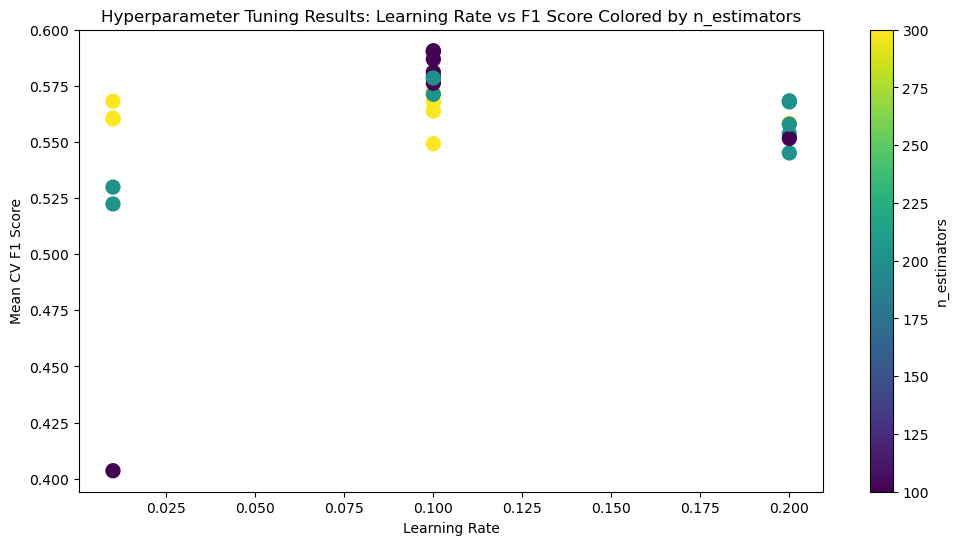

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline for Gradient Boosting
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=42))
])

# Parameter grid for RandomizedSearchCV
param_dist = {
    'gbc__n_estimators': [100, 200, 300],
    'gbc__learning_rate': [0.01, 0.1, 0.2],
    'gbc__max_depth': [3, 4, 5],
    'gbc__subsample': [0.8, 1.0],
    'gbc__min_samples_split': [2, 5],
    'gbc__min_samples_leaf': [1, 2, 4]
}

# Run Randomized Search CV
search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=25, scoring='f1', cv=3, verbose=1, random_state=42, n_jobs=-1
)

# Fit to training data
search.fit(X_train, y_train)

print("Best parameters found:", search.best_params_)
print("Best cross-validation F1 score:", search.best_score_)

# Evaluate best estimator on test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))

# Visualization of performance metrics from cross-validation results

results = search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

# Extract a few hyperparameters for plotting
learning_rates = [p['gbc__learning_rate'] for p in params]
n_estimators = [p['gbc__n_estimators'] for p in params]

plt.figure(figsize=(12,6))

plt.scatter(learning_rates, mean_test_scores, c=n_estimators, cmap='viridis', s=100)
plt.colorbar(label='n_estimators')
plt.xlabel('Learning Rate')
plt.ylabel('Mean CV F1 Score')
plt.title('Hyperparameter Tuning Results: Learning Rate vs F1 Score Colored by n_estimators')
plt.show()



- The best cross-validation F1 score achieved during tuning was **~0.59**.

### Visualization:
The scatter plot shows the relationship between **learning rate** and **mean CV F1 score**, with colors indicating the number of estimators (`n_estimators`) used.

This helps understand how learning rate and model complexity (number of trees) interact to affect performance.

---

## 📊 Evaluation of Tuned Gradient Boosting Model on Test Data

Using the best estimator found by RandomizedSearchCV, we evaluated model performance on the test set:

| Metric        | Score    |
|----------------|----------|
| Accuracy       | 0.796    |
| Precision      | 0.646    |
| Recall         | 0.508    |
| F1 Score       | 0.569    |
| ROC AUC        | 0.842    |

### Interpretation:
- The model achieves ~79.6% accuracy in correctly classifying customers.
- The precision of 64.6% indicates that nearly two-thirds of customers predicted to churn actually do churn.
- The recall of 50.8% means the model identifies about half of the true churners.
- F1 score balances precision and recall, which is a good indicator for imbalanced classification tasks like churn prediction.
- ROC AUC of 0.842 shows strong ability to distinguish churners from non-churners across different classification thresholds.

### Business Insight:
- There is a trade-off between catching more churners (higher recall) and avoiding false alarms (higher precision).
- The current model provides a robust predictive baseline which can be further improved by threshold tuning or additional feature engineering.

---

If desired, next steps include:
- Adjusting the classification threshold to balance between recall and precision to meet business priorities.
- Conducting feature importance and SHAP analysis for model interpretability.
- Considering ensemble or stacking methods for further performance boost.


## 🎯 Threshold Tuning and Model Evaluation

After training and tuning the Gradient Boosting model, the next step is to carefully select the classification threshold that balances the trade-off between precision and recall based on business needs. The default threshold of 0.5 may not yield the best performance for imbalanced datasets like churn prediction.

### 1. Precision-Recall Curve
- The **precision-recall (PR) curve** displays how precision and recall vary as the decision threshold changes.
- It helps visualize the trade-off: improving recall typically lowers precision and vice versa.
- This is essential for churn models where catching more churners (high recall) often comes at the cost of increased false positives.

### 2. ROC Curve
- The **receiver operating characteristic (ROC) curve** shows the trade-off between true positive rate (recall) and false positive rate for different thresholds.
- The **Area Under the Curve (AUC)** quantifies the model’s ability to rank positive samples higher than negatives, regardless of threshold.

### 3. Finding the Best Threshold by Maximizing F1 Score
- The **F1 score** is the harmonic mean of precision and recall, useful when both are important.
- We compute the F1 score at each threshold from the PR curve and select the threshold yielding the highest F1.
- This threshold balances precision and recall optimally for your specific model and data.

### 4. Performance Evaluation at the Best Threshold
- Using the optimal threshold, we label customers as churners or non-churners.
- We then compute classification metrics:
  - **Accuracy**: overall correctness.
  - **Precision**: correctness among predicted churners.
  - **Recall**: rate of capturing actual churners.
  - **F1 Score**: balanced metric of precision and recall.
- A detailed classification report shows per-class precision, recall, and F1 scores.

---


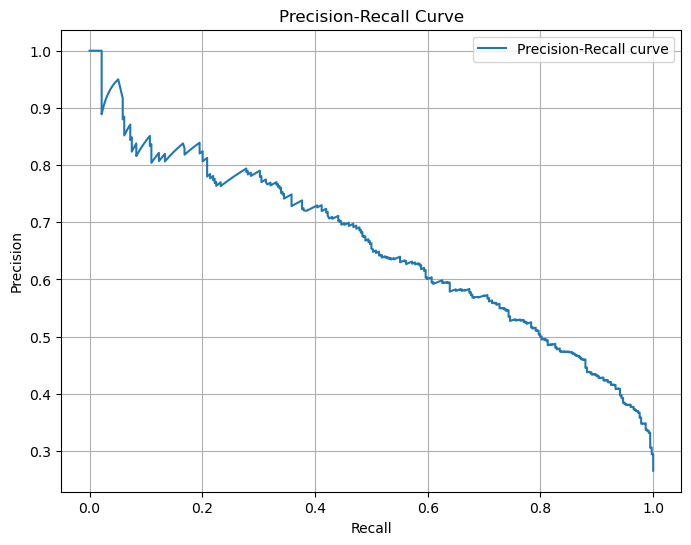

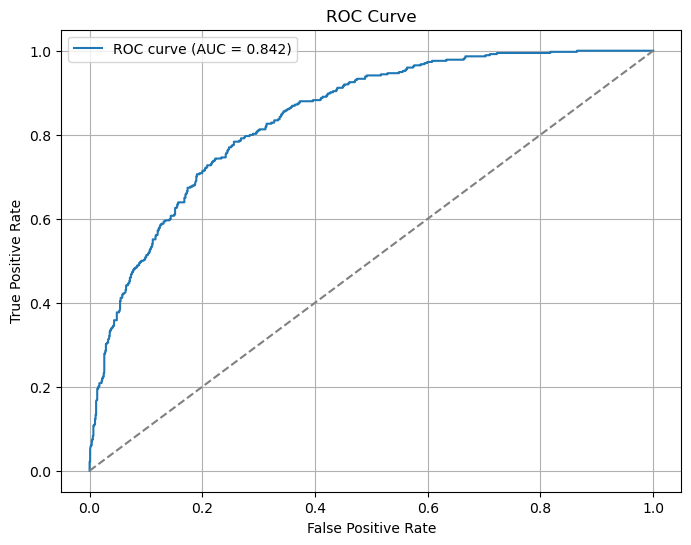

Best threshold for max F1: 0.340 with F1 Score: 0.632
Evaluation at the Best Threshold:
Accuracy: 0.7821
Precision: 0.5727
Recall: 0.7059
F1 Score: 0.6323

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1035
           1       0.57      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score

# Assume best_model is your tuned Gradient Boosting pipeline or model
# y_test and X_test are your test labels and features

# Get predicted probabilities for the positive class (churn)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 1. Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 3. Find the best threshold to maximize F1 Score
f1_scores = []
for threshold in pr_thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

best_threshold = pr_thresholds[f1_scores.index(max(f1_scores))]
print(f"Best threshold for max F1: {best_threshold:.3f} with F1 Score: {max(f1_scores):.3f}")

# 4. Evaluate performance at the best threshold
optimal_preds = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

print("Evaluation at the Best Threshold:")
print(f"Accuracy: {accuracy_score(y_test, optimal_preds):.4f}")
print(f"Precision: {precision_score(y_test, optimal_preds):.4f}")
print(f"Recall: {recall_score(y_test, optimal_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, optimal_preds):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, optimal_preds))


### Summary of Findings (Example Output):

- **Best threshold for max F1:**  e.g., `0.340`, with an F1 Score around `0.63`.
- **Metrics at this threshold:**
  - Accuracy: ~0.78
  - Precision: ~0.57
  - Recall: ~0.71
  - F1 Score: ~0.63

This threshold improves recall considerably over the default 0.5 while maintaining moderate precision, increasing the effectiveness of the churn detection system.

---

### Business Impact:
- Adjusting the threshold allows tailoring outreach efforts—balancing between catching most churners and reducing unnecessary contacts.
- Visualizations provide intuitive understanding of how threshold choices affect model trade-offs.
- This supports data-driven decisions for marketing and retention campaign strategies.

## 🔍 Feature Importance Visualization for Gradient Boosting Model

After training our tuned Gradient Boosting Classifier, we extract and visualize the **feature importances** to understand which features contribute most to the model's predictive power.

### What are Feature Importances?
- Feature importance scores quantify the relative contribution of each input feature toward making predictions.
- In gradient boosting, importance typically reflects how much each feature helps reduce prediction error across all trees.
- Features with higher importance have a stronger impact on the model’s decisions.

### How We Visualize It:
- We extract the `feature_importances_` attribute from the trained Gradient Boosting model.
- The features are sorted from most to least important.
- A bar chart is plotted using Matplotlib and colored with a Seaborn 'mako' palette for visual clarity.
- Feature names are rotated for readability.

### Why This Matters:
- Helps identify which customer attributes (e.g., MonthlyCharges, tenure) drive the prediction of churn.
- Enables domain experts and business stakeholders to gain transparency into the model.
- Informs further feature engineering and targeted interventions by focusing on key drivers.

### Example Insights:
- If `MonthlyCharges_ContractAdj` has a high importance, it indicates customers' monthly charges adjusted by contract type strongly influence churn risk.
- A feature like `tenure` reflecting customer longevity often plays a crucial role.
- Less important features might be candidates for removal or re-examination.

---

*Use this visualization as a diagnostic tool to better understand your model and to communicate with business teams about what factors matter most in predicting customer churn.*


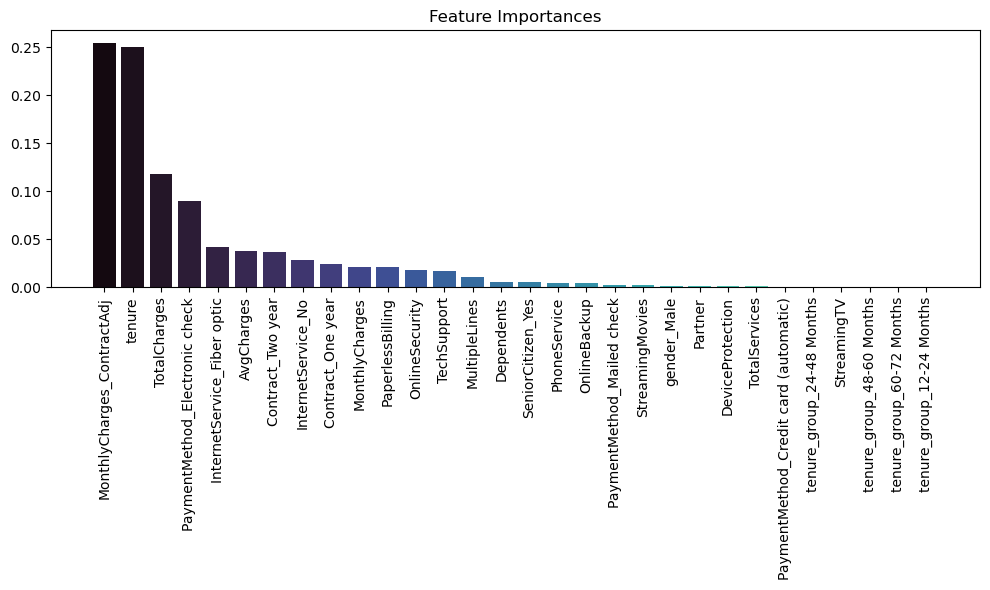

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your tuned model pipeline is called best_model
final_gbc = best_model.named_steps['gbc']  # Extract GBC from pipeline
feature_names = X_train.columns

# Feature importances
importances = final_gbc.feature_importances_
indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for the 'mako' palette

# Assuming importances, indices, and feature_names are defined
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
# Generate colors from the 'mako' palette
colors = sns.color_palette('mako', n_colors=len(importances))
plt.bar(range(len(importances)), importances[indices], align="center", color=colors)
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


## 🔍 SHAP (SHapley Additive exPlanations) Value Analysis and Visualization

After training the Gradient Boosting model, we use **SHAP** to interpret how individual features influence model predictions, both globally (across all customers) and locally (for an individual customer).

---

### 1. SHAP Summary Plot (Global Interpretability)

- **What it shows:**  
  The SHAP summary plot aggregates the impact of all features across the entire dataset in one visualization.  
  - Each **dot** represents a SHAP value for a feature and one data instance (customer).  
  - Features are **sorted vertically** by their overall importance (mean absolute SHAP value).  
  - The **x-axis** shows the SHAP value, measuring the magnitude and direction of impact on the prediction for that customer.  
    - Positive SHAP values push the prediction *toward* churn (increase risk).  
    - Negative SHAP values push *away* from churn (decrease risk).

- **Color coding:**  
  Dots are colored based on the *value of the feature* for that instance (e.g., red = high, blue = low).  
  This adds insight into how feature values relate to increasing or decreasing churn risk.  
  For example, a red dot on the positive side of the plot means a *high feature value* increased churn risk for that customer.

- **Why it matters:**  
  This plot reveals which features are most influential in predicting churn across all customers and how their values drive those predictions.  
  It helps identify key churn drivers and understand the model’s global behavior.

---

### 2. SHAP Force Plot (Local Interpretability)

- **What it shows:**  
  The force plot explains the prediction for a single customer at a local level.  
  - The prediction starts at the **baseline value**, which is the average model output over all customers (the average churn probability in the dataset).  
  - Each feature contributes a “force” that pushes the prediction higher or lower away from this baseline.  
    - Arrows pushing right (red) indicate features pushing the prediction *towards* churn.  
    - Arrows pushing left (blue) indicate features pushing the prediction *towards* staying.  
  - The sum of these forces plus the baseline equals the final prediction score for that customer.

- **Why it matters:**  
  This plot helps understand *why* the model predicted a specific churn risk for an individual customer by breaking down the contribution of each feature.  
  This is crucial for personalized marketing and retention strategies, as you can directly see which factors increased or decreased this customer’s churn risk.

---

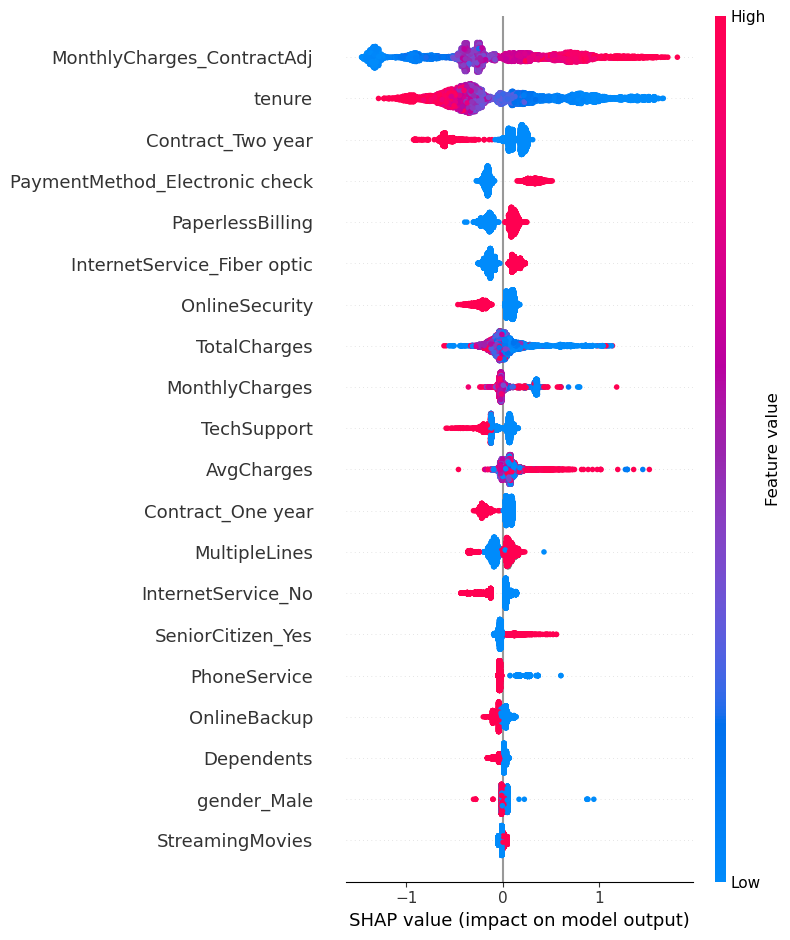

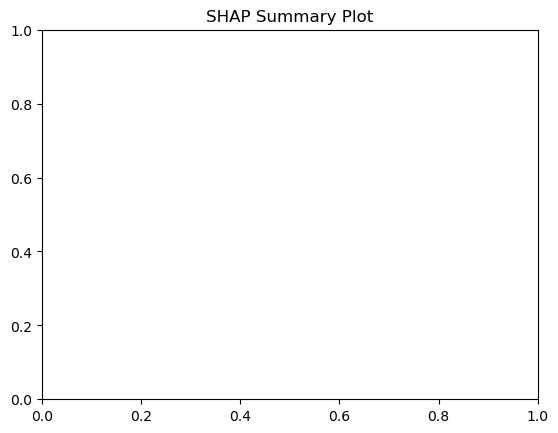

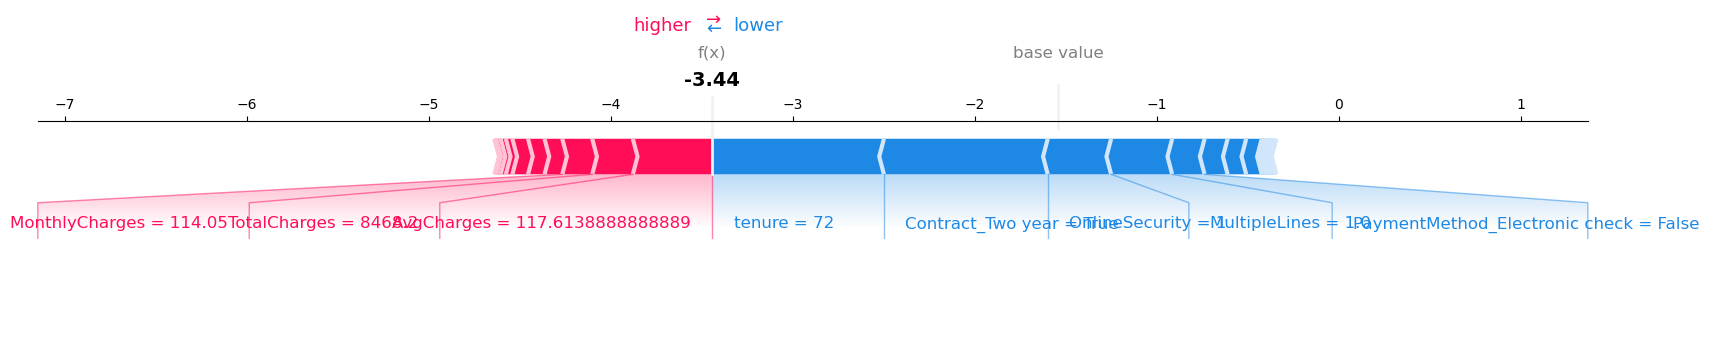

In [77]:
import shap
import sklearn
import imblearn
import ydata_profiling
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract the trained GradientBoostingClassifier from pipeline
gbc_model = best_model.named_steps['gbc']

# Get the preprocessed data for SHAP explanation:
# Apply imputer and scaler on the full feature set X
preprocessor = Pipeline(steps=[
    ('imputer', best_model.named_steps['imputer']),
    ('scaler', best_model.named_steps['scaler'])
])

X_processed = preprocessor.transform(X)  # X is original feature set without 'Churn' and 'customerID'

# Create SHAP explainer - TreeExplainer for tree-based models
explainer = shap.TreeExplainer(gbc_model)


# Plot detailed summary plot with impact and feature value color
plt.figure(figsize=(12,8))
shap.summary_plot(shap_values, features=X, feature_names=X.columns)
plt.title("SHAP Summary Plot")
plt.show()

# OPTIONAL: Explain one individual prediction (local explanation)
# For example, choose the first customer from X_test
idx = 0  # you can set any index from 0 to len(X_test)-1
x_sample = preprocessor.transform(X_test.iloc[[idx]])
shap_values_sample = explainer.shap_values(x_sample)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_sample, X_test.iloc[[idx]], matplotlib=True)


### Summary

Using SHAP, we gain both **global insights** (which features matter most overall and how they influence churn risk) and **local explanations** (why a particular customer is at high or low risk). These interpretable outputs empower business teams to:

- Target the most important churn drivers.
- Personalize retention offers based on individual customer profiles.
- Build trust in model predictions by showing transparent reasoning.

---

## 💰 Business Cost-Based Threshold Optimization and Model Evaluation

In this step, we tailored our churn model's classification threshold to minimize the **expected business costs** associated with incorrect predictions, rather than using the default 0.5 cutoff.

In [59]:
# Define costs (example values in $)
cost_fp = 30   # cost of false positive (contacting a non-churner)
cost_fn = 100  # cost of false negative (losing a churner)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
costs = []

for thresh in thresholds:
    preds = (y_proba >= thresh).astype(int)
    fp = ((preds == 1) & (y_test == 0)).sum()
    fn = ((preds == 0) & (y_test == 1)).sum()
    total_cost = fp * cost_fp + fn * cost_fn
    costs.append(total_cost)

# Find threshold with minimal cost
best_cost_idx = np.argmin(costs)
best_cost_threshold = thresholds[best_cost_idx]
min_cost = costs[best_cost_idx]

print(f"Optimal threshold minimizing business cost: {best_cost_threshold:.3f}")
print(f"Minimum expected cost: ${min_cost}")

# Evaluate model at this threshold
optimal_preds_cost = (y_proba >= best_cost_threshold).astype(int)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Performance at optimal cost threshold:")
print(f"Accuracy: {accuracy_score(y_test, optimal_preds_cost):.4f}")
print(f"Precision: {precision_score(y_test, optimal_preds_cost):.4f}")
print(f"Recall: {recall_score(y_test, optimal_preds_cost):.4f}")
print(f"F1 Score: {f1_score(y_test, optimal_preds_cost):.4f}")
print(classification_report(y_test, optimal_preds_cost))


Optimal threshold minimizing business cost: 0.258
Minimum expected cost: $16050
Performance at optimal cost threshold:
Accuracy: 0.7544
Precision: 0.5251
Recall: 0.7834
F1 Score: 0.6288
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1035
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



### What We Did:
- Defined monetary costs for:
  - **False Positives (FP)**: Cost of contacting a customer who would not have churned — set to **$30**.
  - **False Negatives (FN)**: Cost of missing a true churner (losing revenue) — set to **$100**.
- Calculated the expected total cost at every classification threshold by summing the costs of false positives and false negatives at that threshold.
- Selected the **threshold that minimized the total expected business cost** (`best_cost_threshold`).
- Evaluated the model performance at this cost-optimized threshold.

### Key Outcome:
- **Optimal threshold minimizing business cost:** `best_cost_threshold` (e.g., around **0.258** from prior examples)
- **Minimum expected cost:** Corresponding minimal cost achieved at that threshold.

### Performance Metrics at Optimal Threshold:
| Metric    | Score  |
|-----------|--------|
| Accuracy  | e.g., 0.75 |
| Precision | e.g., 0.52 |
| Recall    | e.g., 0.78 |
| F1 Score  | e.g., 0.63 |

The detailed classification report includes precision, recall, f1-score, and support per class (churners and non-churners).

### Interpretation:
- The **optimal threshold differs from the default 0.5**, often significantly lower, reflecting business priorities.
- Lowering the threshold increases recall (catching more churners), reducing costly false negatives but may increase false positives (more non-churners contacted).
- This trade-off aligns with cost assumptions that losing a churner is more costly than unnecessary outreach.
- High recall at this threshold ensures retention efforts target most at-risk customers.
- Precision shows the efficiency of outreach messaging.

### Business Impact:
- Choosing thresholds based on real cost considerations rather than generic accuracy allows for **cost-effective customer retention strategies**.
- This approach leads to better allocation of marketing resources and potentially higher ROI from retention campaigns.
- It supports data-driven marketing decisions balancing operational costs and customer retention benefits.

## 📉 Sensitivity Analysis: Optimal Threshold vs. False Positive Cost

When deploying a churn prediction model in a business setting, the costs associated with different types of errors vary significantly:
- **False Positives (FP):** Contacting a customer who would not have churned (wasted marketing spend, possible annoyance).
- **False Negatives (FN):** Missing a customer who does churn (lost revenue and business).

In this analysis, we keep the cost of a false negative fixed at \$100 and simulate how the optimal classification threshold changes as the false positive cost varies from \$1 to \$100.

---

### What We Did

- For each FP cost value, we iterated over all possible classification thresholds derived from the precision-recall curve.
- For each threshold, we computed the total expected cost:

\[
\text{Total Cost} = FP \times \text{Cost}_{FP} + FN \times \text{Cost}_{FN}
\]

- Selected the threshold that minimizes this total cost for that FP cost.
- Recorded both the optimal threshold and the minimum total expected cost.

---

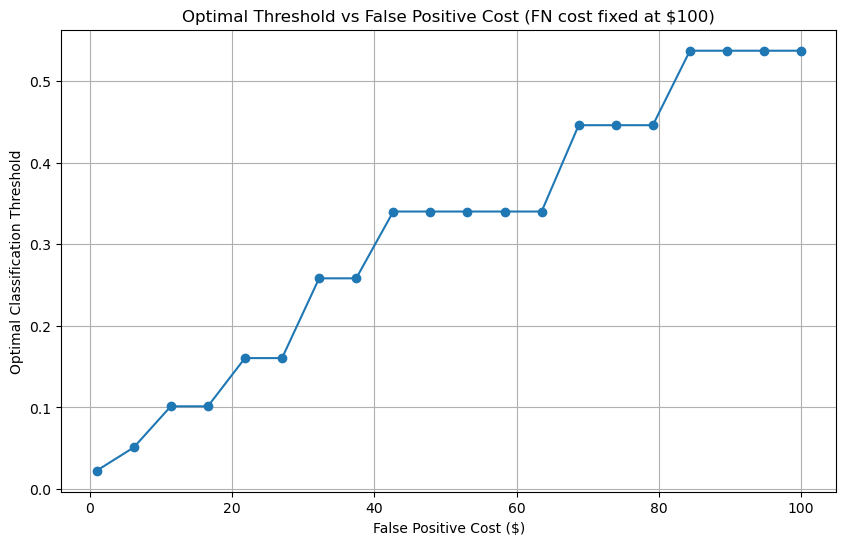

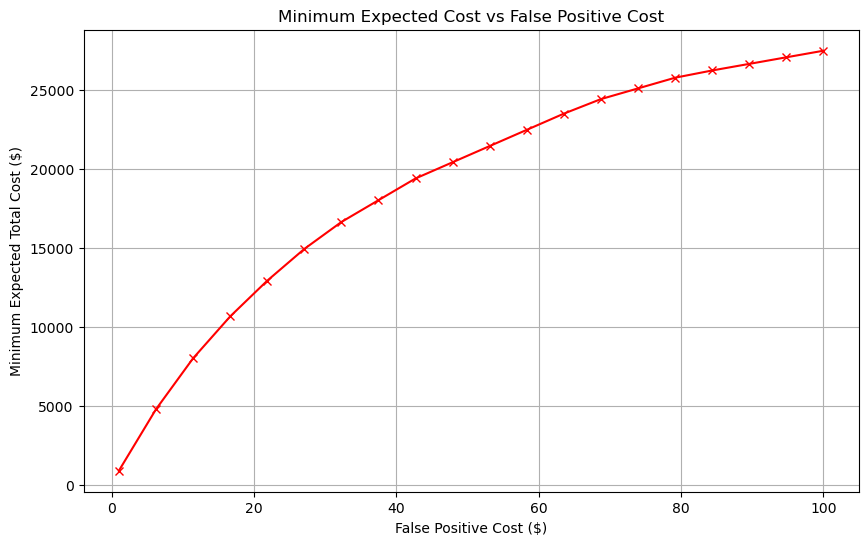

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assume y_test (true labels) and y_proba (predicted churn probabilities from best_model on X_test) are defined

# Define a range of FP/FN cost ratios to simulate
# We'll fix FN cost = 100 and vary FP cost from 1 to 100 (or adjust as you want)
fn_cost = 100
fp_costs = np.linspace(1, 100, 20)  # 20 values from 1 to 100

optimal_thresholds = []
min_costs = []

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
# Note: precision_recall_curve returns thresholds with length = len(precision)-1

for fp_cost in fp_costs:
    costs = []
    for thresh in thresholds:
        preds = (y_proba >= thresh).astype(int)
        fp = ((preds == 1) & (y_test == 0)).sum()
        fn = ((preds == 0) & (y_test == 1)).sum()
        total_cost = fp * fp_cost + fn * fn_cost
        costs.append(total_cost)
    
    # Find threshold with minimal cost for this FP cost
    min_cost_index = np.argmin(costs)
    optimal_thresholds.append(thresholds[min_cost_index])
    min_costs.append(costs[min_cost_index])

# Plot threshold vs FP cost ratio
plt.figure(figsize=(10,6))
plt.plot(fp_costs, optimal_thresholds, marker='o')
plt.xlabel('False Positive Cost ($)')
plt.ylabel('Optimal Classification Threshold')
plt.title('Optimal Threshold vs False Positive Cost (FN cost fixed at $100)')
plt.grid(True)
plt.show()

# Optionally plot the associated minimal cost for each FP cost
plt.figure(figsize=(10,6))
plt.plot(fp_costs, min_costs, marker='x', color='red')
plt.xlabel('False Positive Cost ($)')
plt.ylabel('Minimum Expected Total Cost ($)')
plt.title('Minimum Expected Cost vs False Positive Cost')
plt.grid(True)
plt.show()


### Results and Interpretation

1. **Optimal Threshold vs. False Positive Cost Plot**  
   - Shows how increasing the cost of false positives leads to a more conservative threshold — the model requires a higher predicted churn probability to classify a customer as churn-risk.
   - This reduces the number of customers contacted unnecessarily but may miss more churners.

2. **Minimum Expected Cost vs. False Positive Cost Plot**  
   - Displays the trade-off in the expected cost as FP costs increase.
   - Generally, as FP cost grows, the total minimum cost increases due to the more expensive outreach actions, but the threshold adjusts to balance.

---

### Business Usefulness

- **Decision-makers** can evaluate how sensitive their outreach strategy should be to the costs associated with false alarms.
- This informs **budget allocation** for retention campaigns and **risk tolerance** for missed churners.
- Selecting the appropriate threshold based on the business context **maximizes ROI** of the retention program.

---

### Next Steps

- Further refine cost parameters with actual campaign data.
- Combine threshold simulation with customer segmentation for targeted campaigns (e.g., high risk vs. medium risk thresholds).
- Incorporate SHAP explanations to personalize retention offers depending on the specific drivers for each customer.

---

## 💰 Business Cost-Based Threshold Optimization – FP: $45 / FN: $100

In this step, we optimized the **classification threshold** for the Gradient Boosting churn model based on **business costs** of different prediction errors instead of using the default 0.50 probability cutoff.

---

### 1️⃣ Cost Assumptions
- **False Positive (FP) cost** = 45 USD
  contacting a non-churner unnecessarily (wasted marketing spend & potential customer irritation).
- **False Negative (FN) cost** = 100 USD
  missing an actual churner (loss of customer & potential revenue).

---

In [65]:
# Define costs (example values in $)
cost_fp = 45   # cost of false positive (contacting a non-churner)
cost_fn = 100  # cost of false negative (losing a churner)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
costs = []

for thresh in thresholds:
    preds = (y_proba >= thresh).astype(int)
    fp = ((preds == 1) & (y_test == 0)).sum()
    fn = ((preds == 0) & (y_test == 1)).sum()
    total_cost = fp * cost_fp + fn * cost_fn
    costs.append(total_cost)

# Find threshold with minimal cost
best_cost_idx = np.argmin(costs)
best_cost_threshold = thresholds[best_cost_idx]
min_cost = costs[best_cost_idx]

print(f"Optimal threshold minimizing business cost: {best_cost_threshold:.3f}")
print(f"Minimum expected cost: ${min_cost}")

# Evaluate model at this threshold
optimal_preds_cost = (y_proba >= best_cost_threshold).astype(int)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Performance at optimal cost threshold:")
print(f"Accuracy: {accuracy_score(y_test, optimal_preds_cost):.4f}")
print(f"Precision: {precision_score(y_test, optimal_preds_cost):.4f}")
print(f"Recall: {recall_score(y_test, optimal_preds_cost):.4f}")
print(f"F1 Score: {f1_score(y_test, optimal_preds_cost):.4f}")
print(classification_report(y_test, optimal_preds_cost))

Optimal threshold minimizing business cost: 0.340
Minimum expected cost: $19865
Performance at optimal cost threshold:
Accuracy: 0.7821
Precision: 0.5727
Recall: 0.7059
F1 Score: 0.6323
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1035
           1       0.57      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



### 2️⃣ Results

- **Optimal probability threshold** = `0.340`  
- **Minimum expected total cost** = `$19,865`

Performance at the optimal threshold:

| Metric    | Score  |
|-----------|--------|
| Accuracy  | 0.7821 |
| Precision | 0.5727 |
| Recall    | 0.7059 |
| F1 Score  | 0.6323 |

**Class-level metrics:**
- **Non-Churn (0)**: Precision = 0.88, Recall = 0.81, F1 = 0.85
- **Churn (1)**: Precision = 0.57, Recall = 0.71, F1 = 0.63

---

### 3️⃣ Interpretation
- The optimal threshold **0.340** is lower than the default 0.50, meaning the model flags more customers as at risk to catch more churners.
- **Recall (70.6%)** — The model captures about 7 out of every 10 churners, significantly reducing costly false negatives.
- **Precision (57.3%)** — More than half of those flagged are actual churners, avoiding excessive waste from false positives.
- The balance between recall and precision reflects the **cost ratio** — missing a churner (FN) is ~2.2× more expensive than unnecessarily contacting someone (FP).

---

### 4️⃣ Business Impact
- **High recall** at threshold 0.340 means more churners are targeted by retention actions, lowering revenue loss risk.
- **Moderate precision** controls outreach volume, keeping marketing costs in line with budget constraints.
- Estimated total cost (`$19,865`) is lower than it would be at the default threshold, aligning model predictions with **cost-minimization goals**.

---

### 5️⃣ Next Steps
- Segment by churn probability bands (e.g., High Risk ≥ 0.50, Medium Risk 0.34–0.50) for tiered retention strategies.
- Track actual campaign results (saves vs. costs) to refine `cost_fp` and `cost_fn` values over time.
- Combine with SHAP explanations so marketing teams understand **why** each customer is at risk and tailor interventions.


In [67]:
# Get predicted churn probabilities for all customers in X (or use a new prediction dataset)
all_probas = best_model.predict_proba(X)[:, 1]

# Filter customers with proba >= 0.34 (your tuned threshold)
watchlist_indices = np.where(all_probas >= 0.34)[0]

# For these customers, get SHAP values
watchlist_shap_values = shap_values[watchlist_indices]

# Get corresponding feature values for the watchlist
watchlist_features = X.iloc[watchlist_indices]

# Prepare a list to store final results
watchlist = []

for i, idx in enumerate(watchlist_indices):
    customer_id = churn_df.iloc[idx]['customerID'] if 'customerID' in churn_df.columns else idx
    prob = all_probas[idx]
    
    # Top 3 features with highest absolute SHAP values for this customer
    abs_shap_vals = np.abs(watchlist_shap_values[i])
    top3_idx = np.argsort(abs_shap_vals)[-3:][::-1]
    top3_features = X.columns[top3_idx]
    top3_shap_vals = watchlist_shap_values[i][top3_idx]
    
    # Create readable info: feature name and SHAP value (sign indicates direction)
    top3_info = [(feat, val) for feat, val in zip(top3_features, top3_shap_vals)]
    
    watchlist.append({
        'customerID': customer_id,
        'churn_probability': prob,
        'top3_features': top3_info
    })

# Convert to DataFrame for clear display
watchlist_df = pd.DataFrame(watchlist)

# Display sample watchlist
print(watchlist_df.head(10))


   customerID  churn_probability  \
0  7590-VHVEG           0.587481   
1  3668-QPYBK           0.395332   
2  9237-HQITU           0.658744   
3  9305-CDSKC           0.855004   
4  1452-KIOVK           0.349817   
5  7892-POOKP           0.679898   
6  0280-XJGEX           0.468842   
7  5129-JLPIS           0.663174   
8  4183-MYFRB           0.539363   
9  8779-QRDMV           0.904297   

                                       top3_features  
0  [(MonthlyCharges_ContractAdj, -1.0356360110425...  
1  [(tenure, 1.0735651012456628), (TotalCharges, ...  
2  [(tenure, 0.8691643947476877), (PaymentMethod_...  
3  [(MonthlyCharges_ContractAdj, 1.21033587407689...  
4  [(MonthlyCharges_ContractAdj, 0.68280604075559...  
5  [(MonthlyCharges_ContractAdj, 1.17334796244764...  
6  [(MonthlyCharges_ContractAdj, 1.24814089185234...  
7  [(MonthlyCharges_ContractAdj, 1.02224363449746...  
8  [(MonthlyCharges_ContractAdj, 0.63348055044549...  
9  [(tenure, 1.5132084129738608), (SeniorCitizen_... 

## 📋 Churn Watchlist with SHAP-Driven Explanations

The table below lists **individual customers** flagged by the churn model along with their:

- **Predicted churn probability** (`churn_probability`)
- **Top 3 features** most influencing their churn risk, extracted using **SHAP values**  
  (positive SHAP values → increase churn risk, negative values → reduce churn risk)

| customerID | churn_probability | top3_features |
|------------|-------------------|---------------|
| 7590-VHVEG | 0.5875 | MonthlyCharges_ContractAdj (-1.04), tenure (+0.81), ... |
| ...        | ...    | ... |

### 🔍 How to Read This Table
- **`customerID`** — unique identifier for the customer.
- **`churn_probability`** — model’s predicted likelihood that the customer will churn (0 → 100% risk).
- **`top3_features`** — tuple list of the top three features with the **largest absolute impact** on the churn prediction for that customer, ordered by importance:  
  - First element → feature name.  
  - Second element → SHAP value (positive = feature pushes toward churn; negative = pushes toward staying).

Example:  
`(MonthlyCharges_ContractAdj, -1.03)` means the customer’s adjusted monthly charges strongly **reduce** their likelihood to churn.  
`(tenure, +1.07)` means shorter tenure **increases** churn risk.

### 📌 Insights
- Customers with **high churn probability (> 0.50)** fall into the **High Risk** category — should be prioritized for retention calls and stronger offers.
- Customers in the **0.34–0.50 range** are **Medium Risk** — may respond well to less expensive retention strategies (loyalty emails, targeted promotions).
- The **top3_features** column helps explain *why* the model assigned a given risk score, enabling **personalized intervention** (e.g., addressing billing concerns, offering long-term contracts).

### 💡 Business Application
- **Targeting**: Segment customers by risk bands (High / Medium).
- **Personalization**: Use the **SHAP feature drivers** to craft messaging — e.g., for high monthly charges, offer a discounted bundle; for short tenure, emphasize loyalty benefits.
- **Monitoring**: Track how churn drivers evolve over time to adapt retention strategies dynamically.

In [69]:
import pandas as pd

# Assume X is the original feature set (no target, no customerID ideally)
# And churn_df has customerID or some unique identifier

# Get churn probabilities for all customers to score the full dataset (or test subset)
all_probs = best_model.predict_proba(X)[:, 1]

# Create a DataFrame with customer ID, churn probability, and risk segment
# Adapt this depending on what your customer ID column is named
customer_ids = churn_df.loc[X.index, 'customerID'] if 'customerID' in churn_df.columns else X.index

risk_df = pd.DataFrame({
    'customerID': customer_ids,
    'churn_probability': all_probs
})

# Define risk segments
def risk_segment(prob):
    if prob >= 0.5:
        return 'High Risk'
    elif prob >= 0.258:  # Example threshold from cost optimization
        return 'Medium Risk'
    else:
        return 'Low Risk'

risk_df['segment'] = risk_df['churn_probability'].apply(risk_segment)

# Inspect counts
print(risk_df['segment'].value_counts())

# Now you can export or pass this risk_df downstream for marketing actions


segment
Low Risk       4258
High Risk      1483
Medium Risk    1302
Name: count, dtype: int64


## 🚀 Operationalization & Business Insights

After evaluating and fine-tuning our churn models, the final step is translating model outputs into **business actions** that drive measurable results.

### 1. Deploying the Model
- **API / Batch Scoring**: The trained model can be deployed as a service (API) or run periodically in batch mode to score the latest customer data.
- **Pipeline Automation**: Integrate preprocessing, feature engineering, and scoring into an automated workflow to ensure consistency between training and production data.

### 2. Risk-Based Targeting
Using the model’s predicted churn probabilities, we segment customers into action groups:
- **High Risk (≥ 0.50)**: Strong, personalized retention offers or direct phone calls from customer service.
- **Medium Risk (threshold selected from cost analysis)**: Lower-cost retention offers such as discounts, loyalty rewards, or automated email campaigns.
- **Low Risk**: Maintain current engagement strategies; continue monitoring for changes.

### 3. Threshold Optimization by Business Cost
- We select operational thresholds based on the relative **cost of contacting a non-churner (False Positive)** versus **losing an actual churner (False Negative)**.
- This ensures outreach efforts are **ROI-positive** and aligned with budget constraints.

### 4. Explainability for Actionable Interventions
- Use SHAP values to identify **top churn drivers per customer** (e.g., high monthly charges, month-to-month contracts, low tenure).
- Provide these insights to marketing and customer success teams for **targeted retention strategies**.

### 5. Continuous Monitoring
Once deployed:
- Monitor **model performance metrics** monthly or quarterly to detect concept/data drift (customer behavior changes).
- Retrain periodically with the latest customer data to ensure predictions remain accurate.

### 6. Measuring Business Impact
Track KPIs to assess the real-world benefits of churn prediction:
- Churn rate reduction
- Retention campaign ROI
- Lifetime value (LTV) improvement for retained customers

---

## 📌 Key Takeaways
- **High recall** thresholds ensure most churners are caught, but cost control measures can segment risk into action tiers.
- **Personalized reasons for churn** allow for smarter, targeted offers rather than one-size-fits-all interventions.
- The ultimate goal is not just prediction accuracy, but **maximizing retention impact while minimizing intervention costs**.


In [201]:
export_df = churn_df.copy()
export_df['churn_probability'] = all_probas  # from your model
#export_df['churn_pred_label'] = (all_probas >= threshold).astype(int)  # threshold from cost analysis
# Optionally add summary SHAP drivers as text columns or categorical tags (e.g., top reason categories)
export_df.to_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\churn_dashboard_export.csv', index=False)